In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,6)

In [4]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
df_analyze=df.drop('id',axis=1)

In [8]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [9]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [11]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [12]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


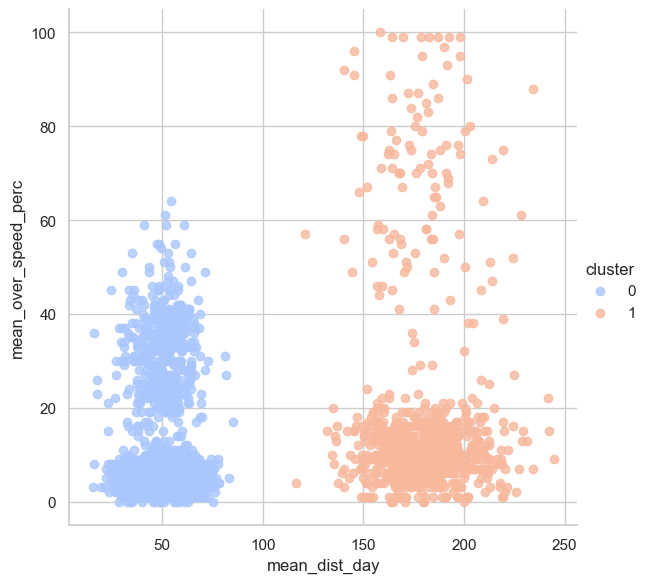

In [23]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=df_analyze, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)


In [22]:
print(df_analyze)

      mean_dist_day  mean_over_speed_perc  cluster
0             71.24                    28        0
1             52.53                    25        0
2             64.54                    27        0
3             55.69                    22        0
4             54.58                    25        0
...             ...                   ...      ...
3995         160.04                    10        1
3996         176.17                     5        1
3997         170.91                    12        1
3998         176.14                     5        1
3999         168.03                     9        1

[4000 rows x 3 columns]


In [25]:
kmeans_4=KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique,counts=np.unique(kmeans_4,return_counts=True)
kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 50.40482436  32.36533958]
 [180.34311782  10.52011494]
 [ 49.99263253   5.20447169]
 [177.83509615  70.28846154]]
{KMeans(n_clusters=4): 1}


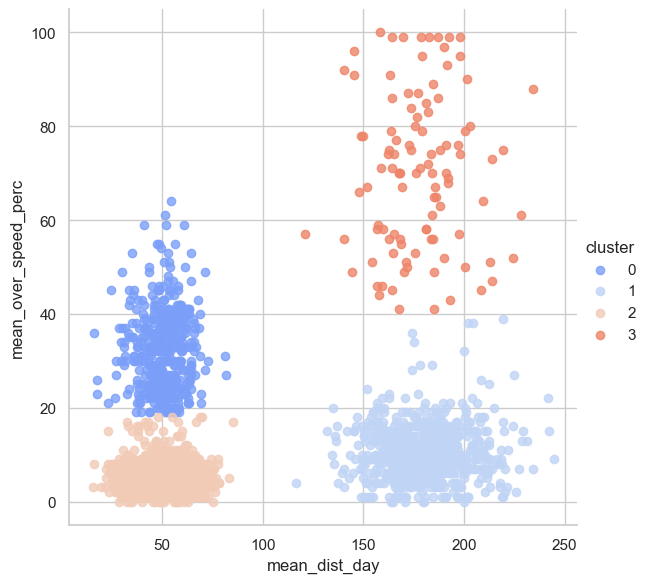

In [26]:
df_analyze['cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=df_analyze, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)
